# StyleFeatureEditor Inference

## Loading repository and enviroment

Before start do not foregt to choose gpu runtime (Runtime -> Change runtime type -> T4 GPU)

In [ ]:
## install ninja
!wget https://github.com/ninja-build/ninja/releases/download/v1.8.2/ninja-linux.zip
!sudo unzip ninja-linux.zip -d /usr/local/bin/
!sudo update-alternatives --install /usr/bin/ninja ninja /usr/local/bin/ninja 1 --force

In [ ]:
# clone repo
!git clone https://github.com/AIRI-Institute/StyleFeatureEditor
%cd StyleFeatureEditor

In [ ]:
from concurrent.futures import ProcessPoolExecutor


def install_packages():
    !pip install wandb omegaconf git+https://github.com/openai/CLIP.git pytorch_fid piq einops timm pyfacer -q


def download_models():
    !git clone https://huggingface.co/AIRI-Institute/StyleFeatureEditor
    !cd StyleFeatureEditor && git lfs pull && cd ..
    !mv StyleFeatureEditor/pretrained_models pretrained_models
    !rm -rf StyleFeatureEditor


with ProcessPoolExecutor() as executor:
    executor.submit(install_packages)
    executor.submit(download_models)

## Model Setup

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
import numpy as np
from PIL import Image
from pathlib import Path
from tqdm import tqdm
import torch
import torchvision.transforms as transforms

sys.path.append(".")
sys.path.append("..")

from runners.simple_runner import SimpleRunner
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

In [ ]:
def plot_one_image(fig, pth, title, subplot_args):
  img = Image.open(pth)
  ax = fig.add_subplot(*subplot_args)
  ax.imshow(img)
  ax.set_title(title, fontsize=20)
  ax.axis('off')

In [ ]:
def plot_edited_images(orig_pth, edited_pth, inversion_pth=None, e4e_inv_pth=None, e4e_edit_pth=None):
    fig_size_y = 1 + (e4e_inv_pth is not None or e4e_edit_pth is not None)
    fig_size_x = 2 + (inversion_pth is not None)
    img_num = 1

    grid = gridspec.GridSpec(fig_size_y, fig_size_x)
    fig = plt.figure(figsize=(16, 8))

    plot_one_image(fig, orig_pth, "Original Image", (fig_size_y, fig_size_x, img_num))
    img_num += 1

    if inversion_pth is not None:
      plot_one_image(fig, inversion_pth, "Reconstructed Image", (fig_size_y, fig_size_x, img_num))
      img_num += 1

    plot_one_image(fig, edited_pth, "Edited Image", (fig_size_y, fig_size_x, img_num))
    img_num += 1

    if e4e_inv_pth is not None:
      plot_one_image(fig, e4e_inv_pth, "e4e inversion", (fig_size_y, fig_size_x, img_num))
      img_num += 1

    if e4e_inv_pth is not None:
      plot_one_image(fig, e4e_edit_pth, "e4e editing", (fig_size_y, fig_size_x, img_num))
      img_num += 1

    plt.show()

In [ ]:
runner = SimpleRunner(
    editor_ckpt_pth="pretrained_models/sfe_editor.pt",
)

In [ ]:
runner.available_editings()

## Inference on internet raw images

Found 1 faces, getting the largest
Save aligned image to editing_res/scarlet/scarlet_aligned.jpg
Prepearing mask
Done
Use mask from editing_res/scarlet/scarlet_aligned_mask.jpg


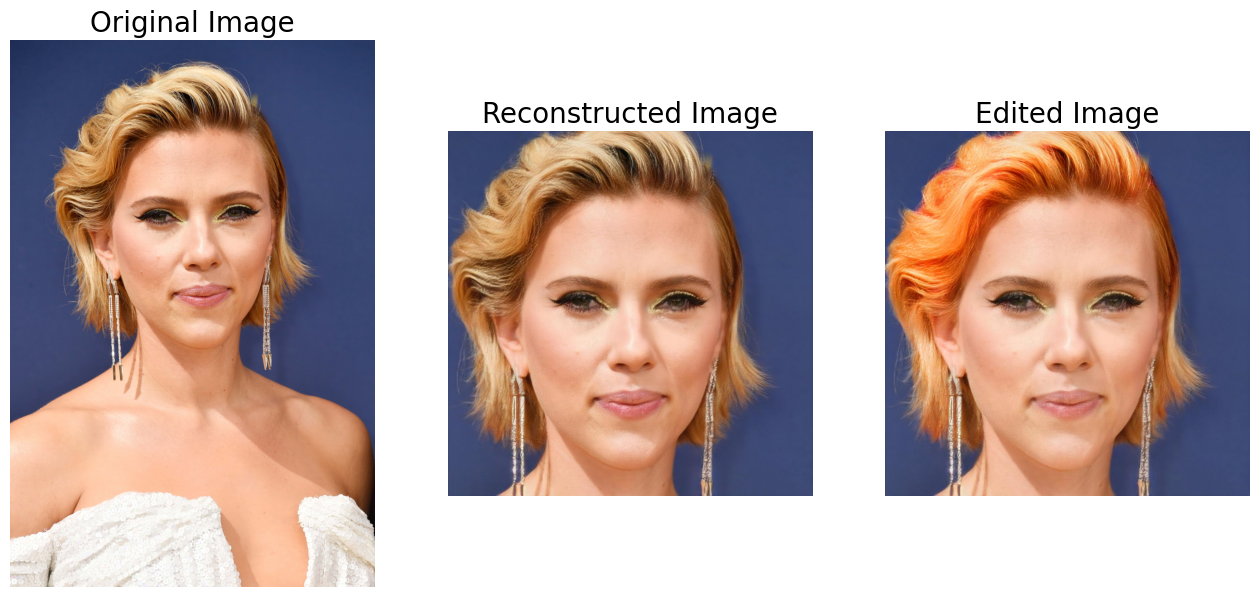

In [ ]:
#@title Fire hair editing { display-mode: "form" }
runner.edit(
    orig_img_pth="notebook/images/scarlet.jpg",
    editing_name="styleclip_global_face with hair_face with fire hair_0.10",
    edited_power=9,
    save_pth="editing_res/scarlet/scarlet.jpg",
    align=True,
    save_inversion=True,
    use_mask=True,
    mask_trashold=0.095
)

plot_edited_images(
    orig_pth="notebook/images/scarlet.jpg",
    edited_pth="editing_res/scarlet/scarlet.jpg",
    inversion_pth="editing_res/scarlet/scarlet_inversion.jpg"
)

Found 1 faces, getting the largest
Save aligned image to editing_res/smith/smith_aligned.jpg


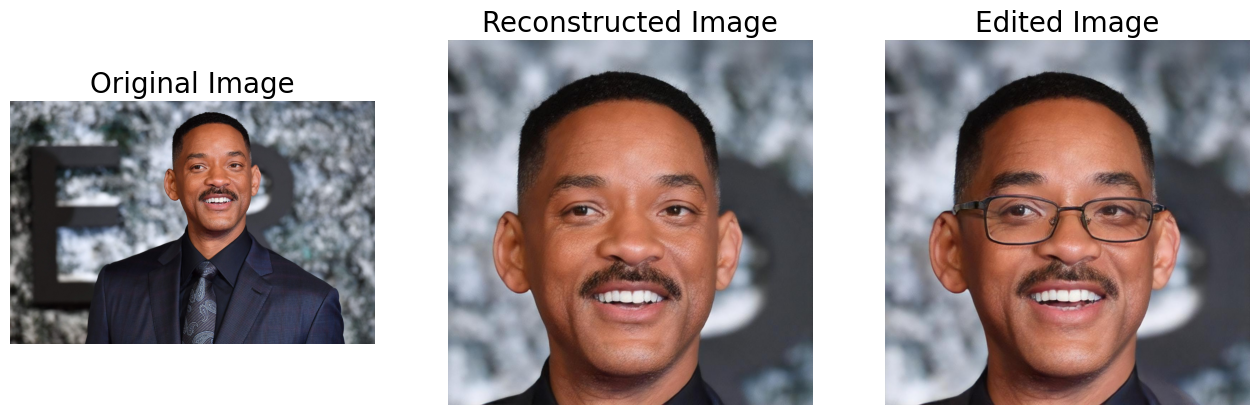

In [ ]:
#@title Add glasses editing { display-mode: "form" }
runner.edit(
    orig_img_pth="notebook/images/smith.jpg",
    editing_name="fs_glasses",
    edited_power=10,
    save_pth="editing_res/smith/smith.jpg",
    align=True,
    save_inversion=True
)

plot_edited_images(
    orig_pth="notebook/images/smith.jpg",
    edited_pth="editing_res/smith/smith.jpg",
    inversion_pth="editing_res/smith/smith_inversion.jpg"
)

Found 1 faces, getting the largest
Save aligned image to editing_res/gosling/gosling_aligned.jpg
Prepearing mask
Done
Use mask from editing_res/gosling/gosling_aligned_mask.jpg


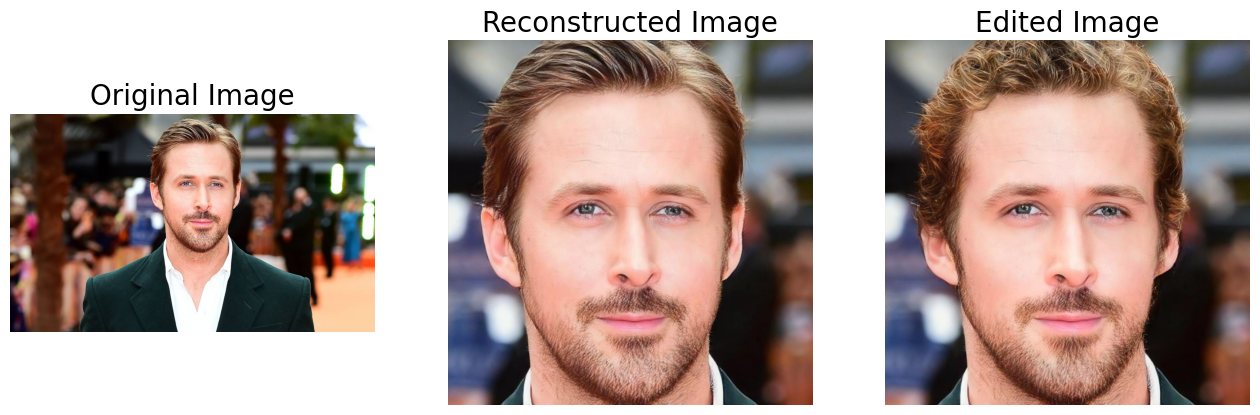

In [ ]:
#@title Curly hairstyle editing { display-mode: "form" }
runner.edit(
    orig_img_pth="notebook/images/gosling.jpg",
    editing_name="curly_hair",
    edited_power=0.10,
    save_pth="editing_res/gosling/gosling.jpg",
    align=True,
    use_mask=True,
    save_inversion=True
)

plot_edited_images(
    orig_pth="notebook/images/gosling.jpg",
    edited_pth="editing_res/gosling/gosling.jpg",
    inversion_pth="editing_res/gosling/gosling_inversion.jpg"
)

In [ ]:
#@title Add makeup editing { display-mode: "form" }
runner.edit(
    orig_img_pth="notebook/images/watson.jpeg",
    editing_name="styleclip_global_woman face_woman face with makeup and lipstick_0.110",
    edited_power=10,
    save_pth="editing_res/watson/watson.jpg",
    align=True,
    save_inversion=True
)

plot_edited_images(
    orig_pth="notebook/images/watson.jpeg",
    edited_pth="editing_res/watson/watson.jpg",
    inversion_pth="editing_res/watson/watson_inversion.jpg"
)

Found 1 faces, getting the largest
Save aligned image to editing_res/robert/robert_aligned.jpg
Use mask from notebook/images/robert_aligned_mask.jpg


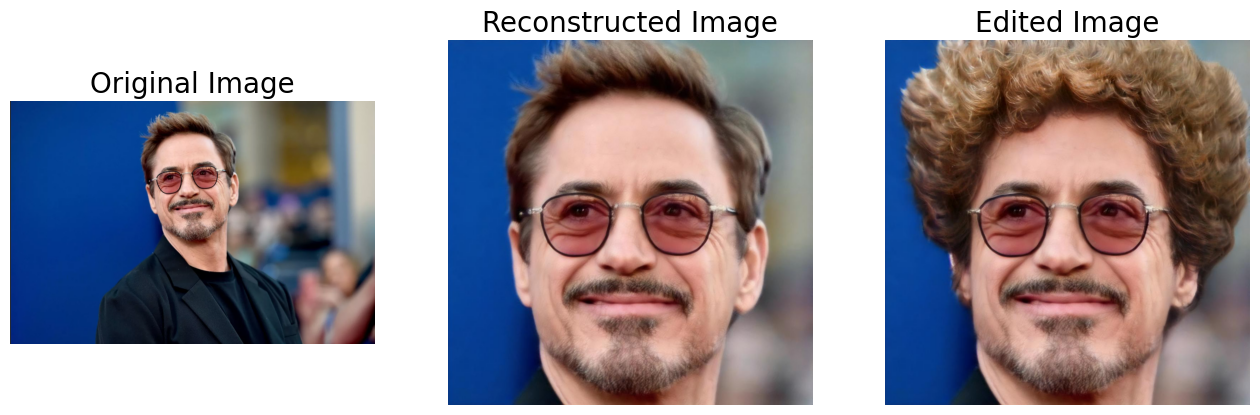

In [ ]:
#@title Afro hairstyle editing { display-mode: "form" }
runner.edit(
    orig_img_pth="notebook/images/robert.png",
    editing_name="styleclip_global_face_face with curly afro_0.14",
    edited_power=5,
    save_pth="editing_res/robert/robert.jpg",
    align=True,
    use_mask=True,
    mask_path="notebook/images/robert_aligned_mask.jpg",
    save_inversion=True,
)

plot_edited_images(
    orig_pth="notebook/images/robert.png",
    edited_pth="editing_res/robert/robert.jpg",
    inversion_pth="editing_res/robert/robert_inversion.jpg"
)

## Inference playground on gif images

Found 1 faces, getting the largest
Save aligned image to editing_res/dicaprio/dicaprio_aligned.jpg
Prepearing mask
Done
Use mask from editing_res/dicaprio/dicaprio_aligned_mask.jpg


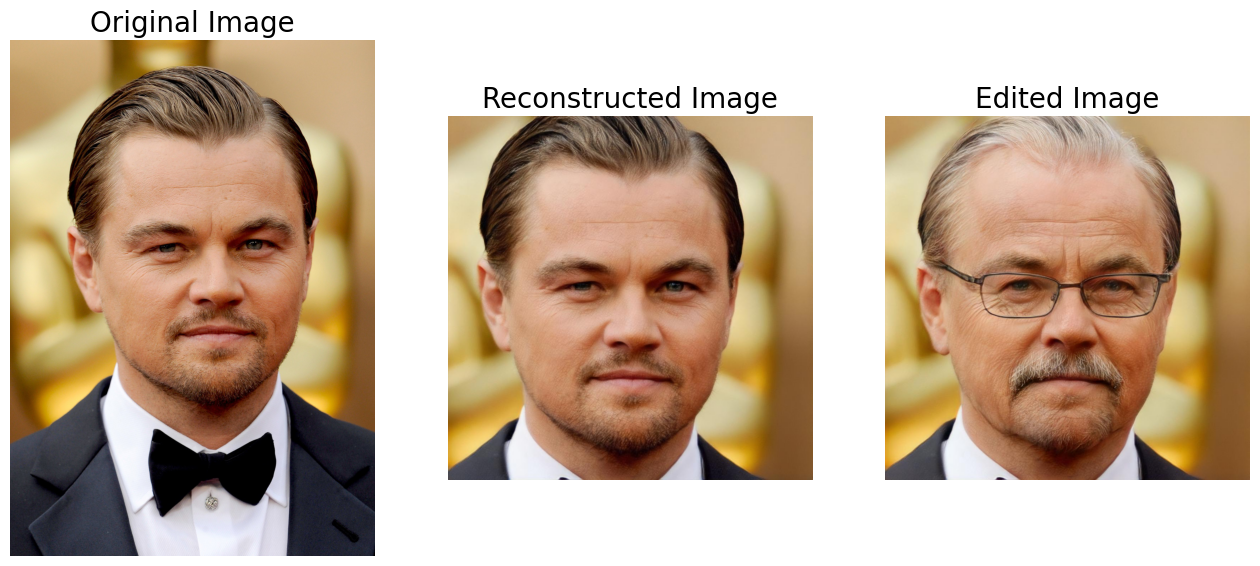

In [ ]:
#@title Increase age { display-mode: "form" }
# @markdown Inference params
Image_path = "assets/dicaprio.png"              # @param {type:"string"}
Editing_name = "age"
Editing_power = 8.5                             # @param {type:"slider", min:0, max:8.5, step:0.1}
Save_path = "editing_res/dicaprio/dicaprio.jpg" # @param {type:"string"}
Align_image = True
Use_mask = True
Default_mask_trashold = 0.99
Mask_path = None
Show_inversion_result = True
Show_e4e_approximation = False

runner.edit(
    orig_img_pth=Image_path,
    editing_name=Editing_name,
    edited_power=Editing_power,
    save_pth=Save_path,
    align=Align_image,
    save_inversion=Show_inversion_result,
    save_e4e=Show_e4e_approximation,
    use_mask=Use_mask,
    mask_trashold=Default_mask_trashold,
    mask_path=Mask_path,
)

Save_path = Path(Save_path)
inversion_pth = None
e4e_inv_pth = None
e4e_edit_pth = None

if Show_inversion_result:
  inversion_pth = Save_path.parents[0] / (Save_path.stem + "_inversion.jpg")

if Show_e4e_approximation:
  e4e_inv_pth = Save_path.parents[0] / (Save_path.stem + "_e4e_inversion.jpg")
  e4e_edit_pth = Save_path.parents[0] / (Save_path.stem + "_e4e_edit.jpg")

plot_edited_images(
    orig_pth=Image_path,
    edited_pth=Save_path,
    inversion_pth=inversion_pth,
    e4e_inv_pth=e4e_inv_pth,
    e4e_edit_pth=e4e_edit_pth
)

Found 1 faces, getting the largest
Save aligned image to editing_res/keanu/keanu_aligned.jpg


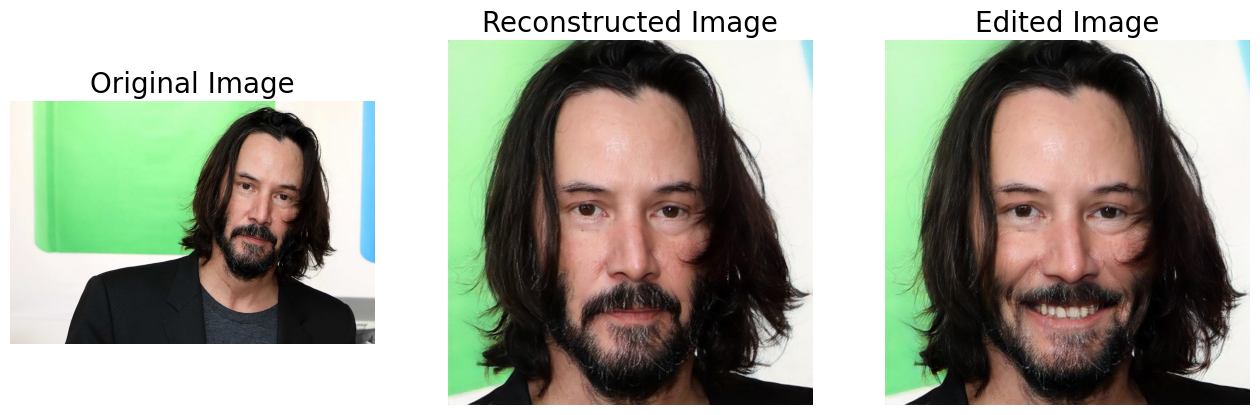

In [ ]:
#@title Add smile { display-mode: "form" }
# @markdown Inference params
Image_path = "assets/keanu.jpeg"                # @param {type:"string"}
Editing_name = "smile"
Editing_power = 3                               # @param {type:"slider", min:0, max:3, step:0.02}
Save_path = "editing_res/keanu/keanu.jpg"       # @param {type:"string"}
Use_mask = False
Align_image = True
Default_mask_trashold = 0.99
Mask_path = None
Show_inversion_result = True
Show_e4e_approximation = False

runner.edit(
    orig_img_pth=Image_path,
    editing_name=Editing_name,
    edited_power=Editing_power,
    save_pth=Save_path,
    align=Align_image,
    save_inversion=Show_inversion_result,
    save_e4e=Show_e4e_approximation,
    use_mask=Use_mask,
    mask_trashold=Default_mask_trashold,
    mask_path=Mask_path,
)

Save_path = Path(Save_path)
inversion_pth = None
e4e_inv_pth = None
e4e_edit_pth = None

if Show_inversion_result:
  inversion_pth = Save_path.parents[0] / (Save_path.stem + "_inversion.jpg")

if Show_e4e_approximation:
  e4e_inv_pth = Save_path.parents[0] / (Save_path.stem + "_e4e_inversion.jpg")
  e4e_edit_pth = Save_path.parents[0] / (Save_path.stem + "_e4e_edit.jpg")

plot_edited_images(
    orig_pth=Image_path,
    edited_pth=Save_path,
    inversion_pth=inversion_pth,
    e4e_inv_pth=e4e_inv_pth,
    e4e_edit_pth=e4e_edit_pth
)

Found 1 faces, getting the largest
Save aligned image to editing_res/potter/potter_aligned.jpg


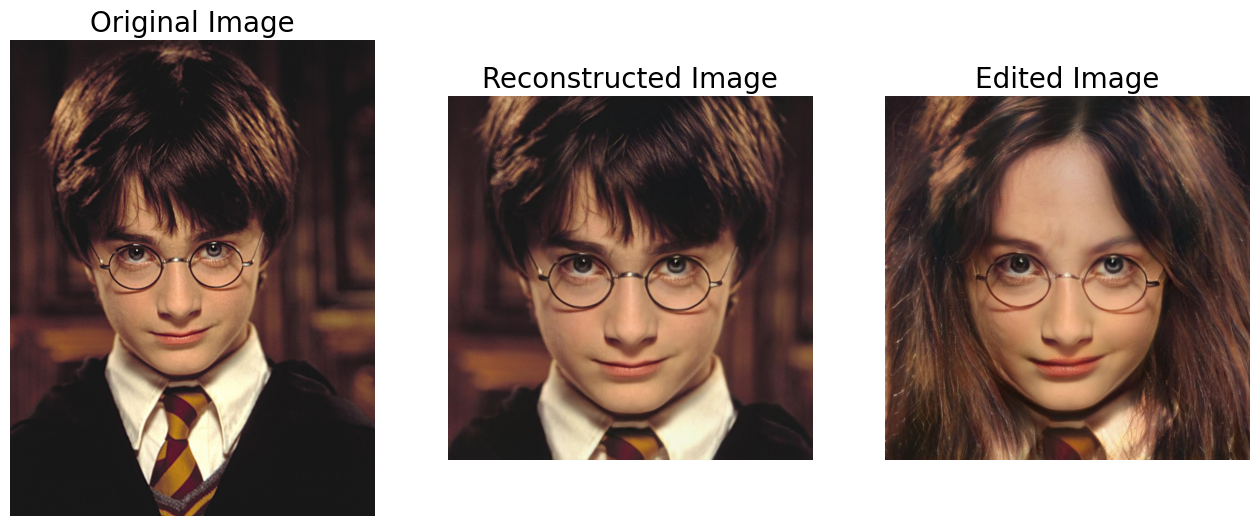

In [ ]:
#@title Change gender { display-mode: "form" }

# @markdown Inference params
Image_path = "assets/potter.jpg"                # @param {type:"string"}
Editing_name = "styleclip_global_man face with short hair with bang_woman face with red lipstick and long hair without bang_0.10"
Editing_power = 6                               # @param {type:"slider", min:0, max:6, step:0.02}
Save_path = "editing_res/potter/potter.jpg"     # @param {type:"string"}
Align_image = True
Use_mask = False
Default_mask_trashold = 0.999
Mask_path = None
Show_inversion_result = True
Show_e4e_approximation = False

runner.edit(
    orig_img_pth=Image_path,
    editing_name=Editing_name,
    edited_power=Editing_power,
    save_pth=Save_path,
    align=Align_image,
    save_inversion=Show_inversion_result,
    save_e4e=Show_e4e_approximation,
    use_mask=Use_mask,
    mask_trashold=Default_mask_trashold,
    mask_path=Mask_path,
)

Save_path = Path(Save_path)
inversion_pth = None
e4e_inv_pth = None
e4e_edit_pth = None

if Show_inversion_result:
  inversion_pth = Save_path.parents[0] / (Save_path.stem + "_inversion.jpg")

if Show_e4e_approximation:
  e4e_inv_pth = Save_path.parents[0] / (Save_path.stem + "_e4e_inversion.jpg")
  e4e_edit_pth = Save_path.parents[0] / (Save_path.stem + "_e4e_edit.jpg")

plot_edited_images(
    orig_pth=Image_path,
    edited_pth=Save_path,
    inversion_pth=inversion_pth,
    e4e_inv_pth=e4e_inv_pth,
    e4e_edit_pth=e4e_edit_pth
)

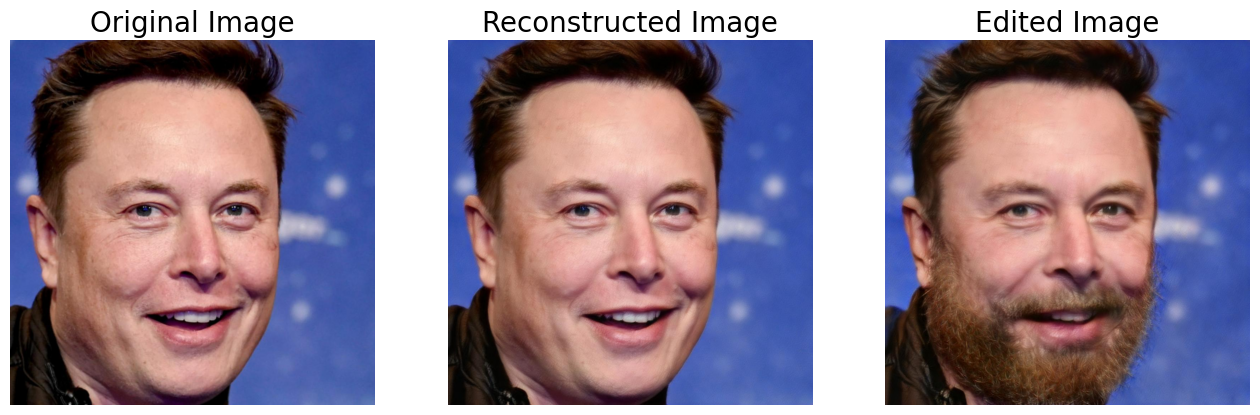

In [ ]:
#@title Add thick beard editing { display-mode: "form" }
# @markdown Inference params
Image_path = "assets/mask.jpg"                  # @param {type:"string"}
First_editing_name = "styleclip_global_shaved face_face with a dark beard and stubble_0.10"
Beard_editing_power = 10                        # @param {type:"slider", min:0, max:10, step:0.05}
Second_editing_name = "sideburns"
Sideburns_editing_power = 3                     # @param {type:"slider", min:0, max:3, step:0.01}
Save_path = "editing_res/mask/mask.jpg"         # @param {type:"string"}
Align_image = False
Use_mask = False
Default_mask_trashold = 0.99
Mask_path = None
Show_inversion_result = True
Show_e4e_approximation = False

Save_path = Path(Save_path)
tmp_save = Save_path.parents[0] / (Save_path.stem + "_tmp.jpg")

runner.edit(
    orig_img_pth=Image_path,
    editing_name=First_editing_name,
    edited_power=Beard_editing_power,
    save_pth=tmp_save,
    align=Align_image,
    save_inversion=Show_inversion_result,
    save_e4e=Show_e4e_approximation,
    use_mask=Use_mask,
    mask_trashold=Default_mask_trashold,
    mask_path=Mask_path,
)

runner.edit(
    orig_img_pth=tmp_save,
    editing_name=Second_editing_name,
    edited_power=-Sideburns_editing_power,
    save_pth=Save_path,
    align=False,
    save_inversion=False,
    save_e4e=Show_e4e_approximation,
    use_mask=Use_mask,
    mask_trashold=Default_mask_trashold,
    mask_path=Mask_path,
)

inversion_pth = None
e4e_inv_pth = None
e4e_edit_pth = None

if Show_inversion_result:
  inversion_pth = Save_path.parents[0] / (Save_path.stem + "_tmp_inversion.jpg")

if Show_e4e_approximation:
  e4e_inv_pth = Save_path.parents[0] / (Save_path.stem + "_e4e_inversion.jpg")
  e4e_edit_pth = Save_path.parents[0] / (Save_path.stem + "_e4e_edit.jpg")

plot_edited_images(
    orig_pth=Image_path,
    edited_pth=Save_path,
    inversion_pth=inversion_pth,
    e4e_inv_pth=e4e_inv_pth,
    e4e_edit_pth=e4e_edit_pth
)

## Template for your editing

In [ ]:
runner.available_editings()

Found 1 faces, getting the largest
Save aligned image to editing_res/dicaprio/dicaprio_aligned.jpg
Prepearing mask
Done
Use mask from editing_res/dicaprio/dicaprio_aligned_mask.jpg


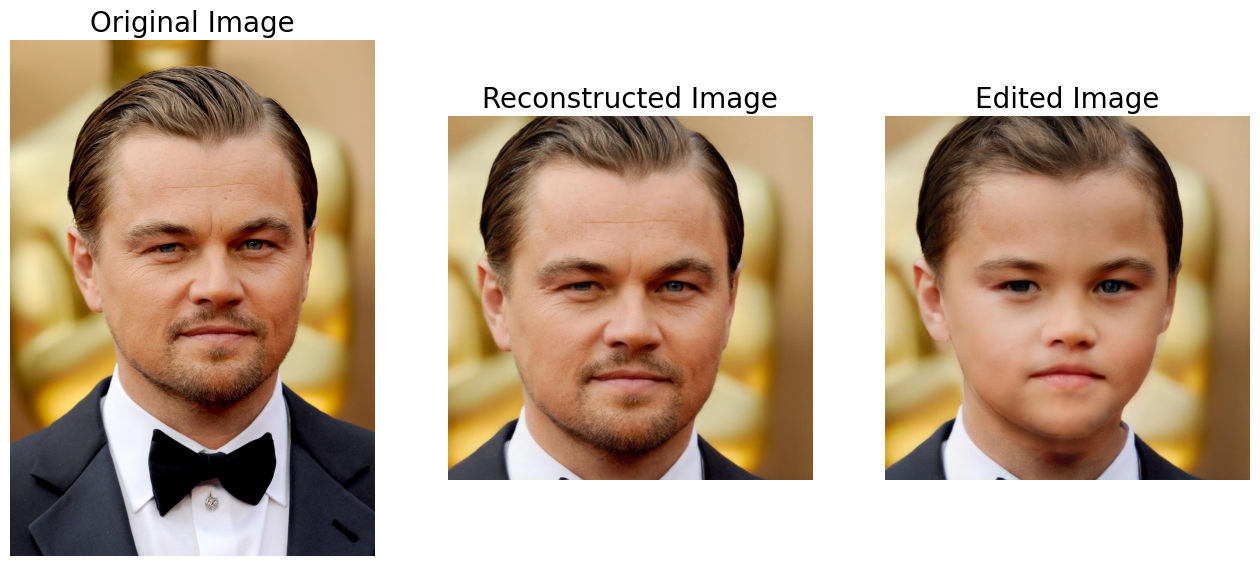

In [ ]:
#@title Inference Playground { display-mode: "form" }
# @markdown Inference params
Image_path = "assets/dicaprio.png"              # @param {type:"string"}
Editing_name = "age"                            # @param {type:"string"}
Editing_power = -8                             # @param {type:"slider", min:-10, max:10, step:0.01}
Save_path = "editing_res/dicaprio/dicaprio.jpg" # @param {type:"string"}
Align_image = True                              # @param {type:"boolean"}
Use_mask = True                                 # @param {type:"boolean"}
Default_mask_trashold = 0.99                    # @param {type:"slider", min:0, max:1, step:0.01}
Mask_path = None                                # @param {type:"string"}
Show_inversion_result = True                    # @param {type:"boolean"}
Show_e4e_approximation = False                  # @param {type:"boolean"}

runner.edit(
    orig_img_pth=Image_path,
    editing_name=Editing_name,
    edited_power=Editing_power,
    save_pth=Save_path,
    align=Align_image,
    save_inversion=Show_inversion_result,
    save_e4e=Show_e4e_approximation,
    use_mask=Use_mask,
    mask_trashold=Default_mask_trashold,
    mask_path=Mask_path,
)

Save_path = Path(Save_path)
inversion_pth = None
e4e_inv_pth = None
e4e_edit_pth = None

if Show_inversion_result:
  inversion_pth = Save_path.parents[0] / (Save_path.stem + "_inversion.jpg")

if Show_e4e_approximation:
  e4e_inv_pth = Save_path.parents[0] / (Save_path.stem + "_e4e_inversion.jpg")
  e4e_edit_pth = Save_path.parents[0] / (Save_path.stem + "_e4e_edit.jpg")

plot_edited_images(
    orig_pth=Image_path,
    edited_pth=Save_path,
    inversion_pth=inversion_pth,
    e4e_inv_pth=e4e_inv_pth,
    e4e_edit_pth=e4e_edit_pth
)

## Making gif for your editing

In [ ]:
#@title Inference Playground { display-mode: "form" }
# @markdown Inference params
Image_path = "assets/dicaprio.png"              # @param {type:"string"}
Editing_name = "age"                            # @param {type:"string"}
Start_editing_power = 0                         # @param {type:"slider", min:-10, max:10, step:0.01}
End_editing_power = 8.5                         # @param {type:"slider", min:-10, max:10, step:0.01}
Path_to_save_dir = "editing_res/dicaprio_gif/"  # @param {type:"string"}
Gif_type = "gif"                                # @param ["webp", "gif"]
N_frames = 120                                  # @param {type:"integer"}
Gif_size = 256                                  # @param {type:"integer"}
Align_image = True                              # @param {type:"boolean"}
Use_mask = True                                # @param {type:"boolean"}
Default_mask_trashold = 0.99                    # @param {type:"slider", min:0, max:1, step:0.01}
Mask_path = None                                # @param {type:"string"}

powers = np.linspace(Start_editing_power, End_editing_power, N_frames)

Path_to_save_dir = Path(Path_to_save_dir)
if Align_image or Use_mask:
  tmp_save_pth = Path_to_save_dir / "tmp.jpg"
  runner.edit(
      orig_img_pth=Image_path,
      editing_name=Editing_name,
      edited_power=0,
      save_pth=tmp_save_pth,
      align=Align_image,
      save_inversion=False,
      save_e4e=False,
      use_mask=Use_mask,
      mask_trashold=Default_mask_trashold,
      mask_path=Mask_path,
  )

  if Align_image:
    Image_path =  Path_to_save_dir / "tmp_aligned.jpg"

  if Use_mask and Mask_path is None and not Align_image:
    Mask_path = Path_to_save_dir / "tmp_mask.jpg"

  if Use_mask and Mask_path is None and Align_image:
    Mask_path = Path_to_save_dir / "tmp_aligned_mask.jpg"

print("Start creating frames")

frames = []
for power in tqdm(powers):
  save_pth = Path_to_save_dir / f"frame.jpg"
  runner.edit(
      orig_img_pth=Image_path,
      editing_name=Editing_name,
      edited_power=power,
      save_pth=save_pth,
      align=False,
      save_inversion=False,
      save_e4e=False,
      use_mask=Use_mask,
      mask_path=Mask_path,
  )
  frames.append(Image.open(save_pth).resize((Gif_size, Gif_size)))

frames = [frames[0]] * 30 + frames + [frames[-1]] * 30
frames = frames + frames[::-1]

print("Frames creation complete, start creating animation")

frames[0].save(
    Path_to_save_dir / f"result.{Gif_type}",
    save_all=True,
    append_images=frames[1:],
    duration=30,
    loop=0,
)

print("Done")
